# FLIGHT_PRICE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fp=pd.read_excel(r"C:\Users\daved\Downloads\Data_Train.xlsx")

In [3]:
fp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
fp["Date_of_Journey"].str.split("/").str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [5]:
fp["Date_of_Journey"].str.split("/").str[1]

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Date_of_Journey, Length: 10683, dtype: object

In [6]:
fp["Date"]=fp["Date_of_Journey"].str.split("/").str[0]
fp["Month"]=fp["Date_of_Journey"].str.split("/").str[1]
fp["Year"]=fp["Date_of_Journey"].str.split("/").str[2]

In [7]:
fp["Date"]=fp["Date"].astype(int)
fp["Month"]=fp["Month"].astype(int)
fp["Year"]=fp["Year"].astype(int)

In [8]:
fp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [9]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [10]:
fp.drop(["Date_of_Journey"],axis=1,inplace=True)

In [11]:
fp

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [12]:
fp[("Additional_Info")]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object

In [13]:
fp["Arrival_Time"].str.strip("").str[0]

0        0
1        1
2        0
3        2
4        2
        ..
10678    2
10679    2
10680    1
10681    1
10682    1
Name: Arrival_Time, Length: 10683, dtype: object

In [14]:
fp["Arrival_Time"]=fp["Arrival_Time"].apply(lambda x : x.split(' ')[0])

In [15]:
fp["Arrival_hour"]=fp["Arrival_Time"].str.split(":").str[0]
fp["Arrival_min"]=fp["Arrival_Time"].str.split(":").str[1]

In [16]:
fp.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [17]:
fp.drop(["Arrival_Time"],axis=1,inplace=True)

In [18]:
fp.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [19]:
fp["Dep_Time"]=fp["Dep_Time"].apply(lambda x : x.split(' ')[0])

In [20]:
fp["Dep_hour"]=fp["Dep_Time"].str.split(":").str[0]
fp["Dep_min"]=fp["Dep_Time"].str.split(":").str[1]

In [21]:
fp.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


In [22]:
fp.drop(["Dep_Time"],axis=1,inplace=True)

In [23]:
fp.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


In [24]:
fp.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Arrival_hour       object
Arrival_min        object
Dep_hour           object
Dep_min            object
dtype: object

In [25]:
fp.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min'],
      dtype='object')

In [26]:
fp.columns=fp.columns.str.strip()

In [27]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  object
 12  Arrival_min      10683 non-null  object
 13  Dep_hour         10683 non-null  object
 14  Dep_min          10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [28]:
fp.describe()

,Price,Date,Month,Year
count,10683.000000,10683.000000,10683.000000,10683.0
mean,9087.064121,13.508378,4.708602,2019.0
std,4611.359167,8.479277,1.164357,0.0
min,1759.000000,1.000000,3.000000,2019.0
25%,5277.000000,6.000000,3.000000,2019.0
50%,8372.000000,12.000000,5.000000,2019.0
75%,12373.000000,21.000000,6.000000,2019.0
max,79512.000000,27.000000,6.000000,2019.0


In [29]:
fp.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Arrival_hour       object
Arrival_min        object
Dep_hour           object
Dep_min            object
dtype: object

In [30]:
fp[~fp.Airline.str.isnumeric()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,11,20,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


# 1.  Analysis of Flights and Price:

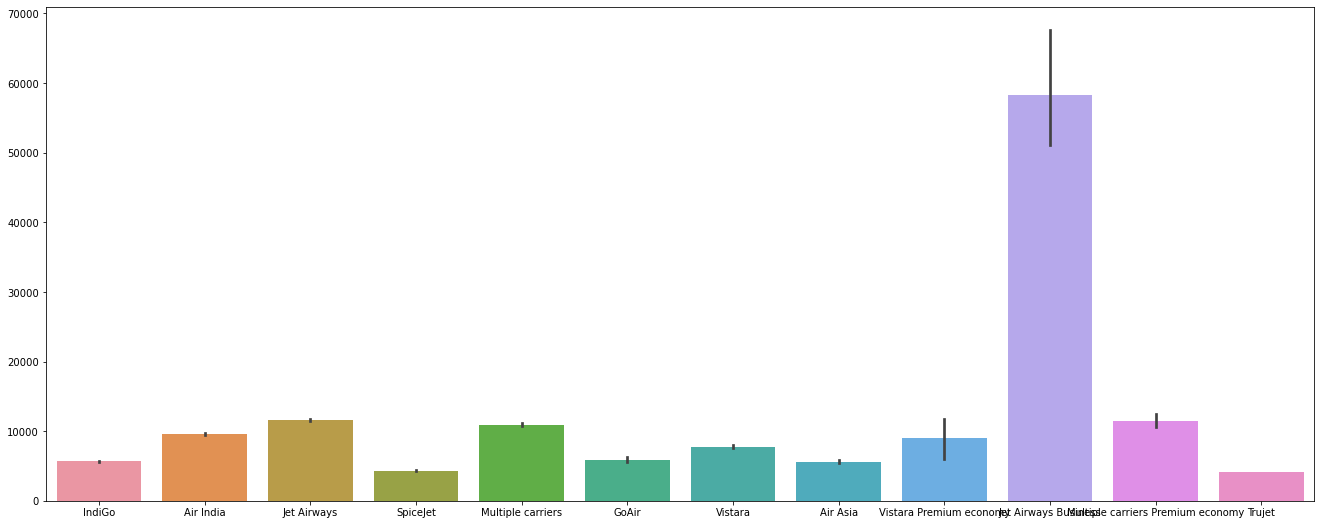

In [31]:
plt.figure(figsize=(50,20))
plt.subplot(2, 2, 1)
a=sns.barplot(x=fp["Airline"].values, y=fp["Price"].values)
plt.show()

In [32]:
fp.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


In [33]:
fp["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [34]:
fp["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [35]:
fp["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [36]:
fp["Destination"]=fp["Destination"].map({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5, 'Hyderabad':6})

In [37]:
fp["Source"]=fp["Source"].map({'Banglore':11, 'Kolkata':12, 'Delhi':13, 'Chennai':14, 'Mumbai':15})

In [38]:
fp["Airline"]=fp["Airline"].map({'IndiGo':1, 'Air India':2, 'Jet Airways':3, 'SpiceJet':4,'Multiple carriers':5, 'GoAir':6, 'Vistara':7, 'Air Asia':8, 'Vistara Premium economy':9,'Jet Airways Business':10,'Multiple carriers Premium economy':11, 'Trujet':12})

In [39]:
fp.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,1,11,1,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,2,12,2,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


In [40]:
fp.drop(["Route"],axis=1,inplace=True)

In [41]:
fp.tail(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
10681,7,11,1,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30
10682,2,13,3,8h 20m,2 stops,No info,11753,9,5,2019,19,15,10,55


In [42]:
fp["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [43]:
fp.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,1,11,1,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,2,12,2,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,3,13,3,19h,2 stops,No info,13882,9,6,2019,04,25,09,25
3,1,12,2,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,1,11,1,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [44]:
fp.tail(5)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
10678,8,12,2,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,2,12,2,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,3,11,5,3h,non-stop,No info,7229,27,4,2019,11,20,08,20
10681,7,11,1,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30
10682,2,13,3,8h 20m,2 stops,No info,11753,9,5,2019,19,15,10,55


In [45]:
fp["Total_Stops"]=fp["Total_Stops"].map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4,"nan":0})

In [46]:
fp.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,1,11,1,2h 50m,0.0,No info,3897,24,3,2019,01,10,22,20
1,2,12,2,7h 25m,2.0,No info,7662,1,5,2019,13,15,05,50
2,3,13,3,19h,2.0,No info,13882,9,6,2019,04,25,09,25
3,1,12,2,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,05
4,1,11,1,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [47]:
fp["Total_Stops"].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [48]:
fp.dtypes

Airline              int64
Source               int64
Destination          int64
Duration            object
Total_Stops        float64
Additional_Info     object
Price                int64
Date                 int32
Month                int32
Year                 int32
Arrival_hour        object
Arrival_min         object
Dep_hour            object
Dep_min             object
dtype: object

In [49]:
fp["Total_Stops"].value_counts()

1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64

In [50]:
fp[fp["Total_Stops"].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,2,13,3,23h 40m,NaN,No info,7480,6,5,2019,09,25,09,45


In [51]:
fp.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
dtype: int64

In [52]:
fp=fp.drop(fp.index[9039])

In [53]:
fp

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,1,11,1,2h 50m,0.0,No info,3897,24,3,2019,01,10,22,20
1,2,12,2,7h 25m,2.0,No info,7662,1,5,2019,13,15,05,50
2,3,13,3,19h,2.0,No info,13882,9,6,2019,04,25,09,25
3,1,12,2,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,05
4,1,11,1,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,12,2,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,55
10679,2,12,2,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,45
10680,3,11,5,3h,0.0,No info,7229,27,4,2019,11,20,08,20
10681,7,11,1,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,30


In [54]:
fp.Total_Stops.unique()

array([0., 2., 1., 3., 4.])

In [55]:
fp["Total_Stops"][9035:9045]

9035    0.0
9036    0.0
9037    0.0
9038    0.0
9040    2.0
9041    1.0
9042    1.0
9043    2.0
9044    1.0
9045    1.0
Name: Total_Stops, dtype: float64

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [57]:
fp["Additional_Info"]=labelencoder.fit_transform(fp["Additional_Info"])

In [58]:
fp.shape

(10682, 14)

In [59]:
fp.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,1,11,1,2h 50m,0.0,8,3897,24,3,2019,01,10,22,20
1,2,12,2,7h 25m,2.0,8,7662,1,5,2019,13,15,05,50


In [60]:
fp["Total_Stops"]=fp["Total_Stops"].fillna(fp["Total_Stops"].mode()[0])

In [61]:
fp.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,1,11,1,2h 50m,0.0,8,3897,24,3,2019,01,10,22,20
1,2,12,2,7h 25m,2.0,8,7662,1,5,2019,13,15,05,50
2,3,13,3,19h,2.0,8,13882,9,6,2019,04,25,09,25
3,1,12,2,5h 25m,1.0,8,6218,12,5,2019,23,30,18,05
4,1,11,1,4h 45m,1.0,8,13302,1,3,2019,21,35,16,50


In [62]:
fp.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0
mean,3.151563,12.486051,3.024995,0.824190,7.392998,9087.214567,13.509081,4.708575,2019.0
std,1.784673,1.060232,1.309166,0.675229,1.214254,4611.548810,8.479363,1.164408,0.0
min,1.000000,11.000000,1.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0
25%,2.000000,12.000000,2.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,2019.0
50%,3.000000,13.000000,3.000000,1.000000,8.000000,8372.000000,12.000000,5.000000,2019.0
75%,4.000000,13.000000,3.000000,1.000000,8.000000,12373.000000,21.000000,6.000000,2019.0
max,12.000000,15.000000,6.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,2019.0


In [63]:
fp.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year
Airline,1.000000,-0.046210,-0.024182,-0.033824,0.003445,0.067013,0.019493,0.028781,NaN
Source,-0.046210,1.000000,0.420846,0.104597,0.038948,-0.052764,0.058401,0.132569,NaN
Destination,-0.024182,0.420846,1.000000,-0.406176,0.073506,-0.395690,0.047248,0.189275,NaN
Total_Stops,-0.033824,0.104597,-0.406176,1.000000,-0.082439,0.603897,-0.009451,0.054383,NaN
Additional_Info,0.003445,0.038948,0.073506,-0.082439,1.000000,-0.065463,-0.016296,-0.051491,NaN
Price,0.067013,-0.052764,-0.395690,0.603897,-0.065463,1.000000,-0.153774,-0.103643,NaN
Date,0.019493,0.058401,0.047248,-0.009451,-0.016296,-0.153774,1.000000,-0.038359,NaN
Month,0.028781,0.132569,0.189275,0.054383,-0.051491,-0.103643,-0.038359,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  int64  
 1   Source           10682 non-null  int64  
 2   Destination      10682 non-null  int64  
 3   Duration         10682 non-null  object 
 4   Total_Stops      10682 non-null  float64
 5   Additional_Info  10682 non-null  int32  
 6   Price            10682 non-null  int64  
 7   Date             10682 non-null  int32  
 8   Month            10682 non-null  int32  
 9   Year             10682 non-null  int32  
 10  Arrival_hour     10682 non-null  object 
 11  Arrival_min      10682 non-null  object 
 12  Dep_hour         10682 non-null  object 
 13  Dep_min          10682 non-null  object 
dtypes: float64(1), int32(4), int64(4), object(5)
memory usage: 1.1+ MB


In [65]:
x=fp.drop("Price",axis=1)
y=fp["Price"]

In [66]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [67]:
x

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,1,11,1,2h 50m,0.0,8,24,3,2019,01,10,22,20
1,2,12,2,7h 25m,2.0,8,1,5,2019,13,15,05,50
2,3,13,3,19h,2.0,8,9,6,2019,04,25,09,25
3,1,12,2,5h 25m,1.0,8,12,5,2019,23,30,18,05
4,1,11,1,4h 45m,1.0,8,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,12,2,2h 30m,0.0,8,9,4,2019,22,25,19,55
10679,2,12,2,2h 35m,0.0,8,27,4,2019,23,20,20,45
10680,3,11,5,3h,0.0,8,27,4,2019,11,20,08,20
10681,7,11,1,2h 40m,0.0,8,1,3,2019,14,10,11,30


array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>],
       [<AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Additional_Info'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

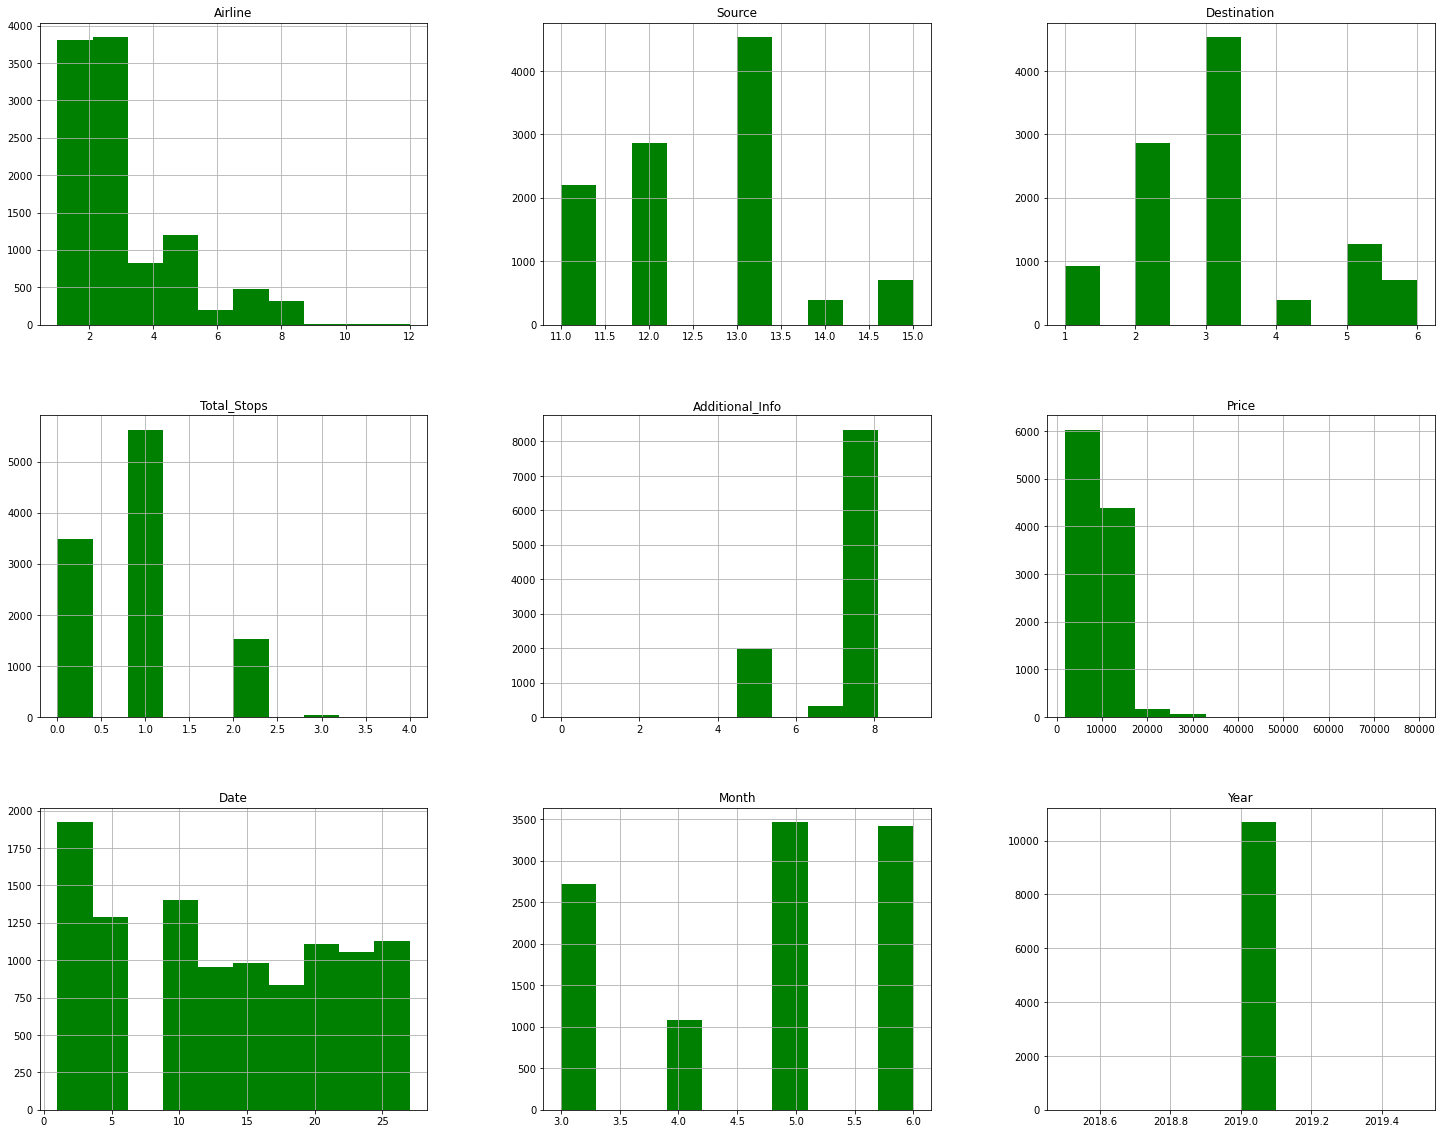

In [68]:
fp.hist(figsize=(25,20),color="g")

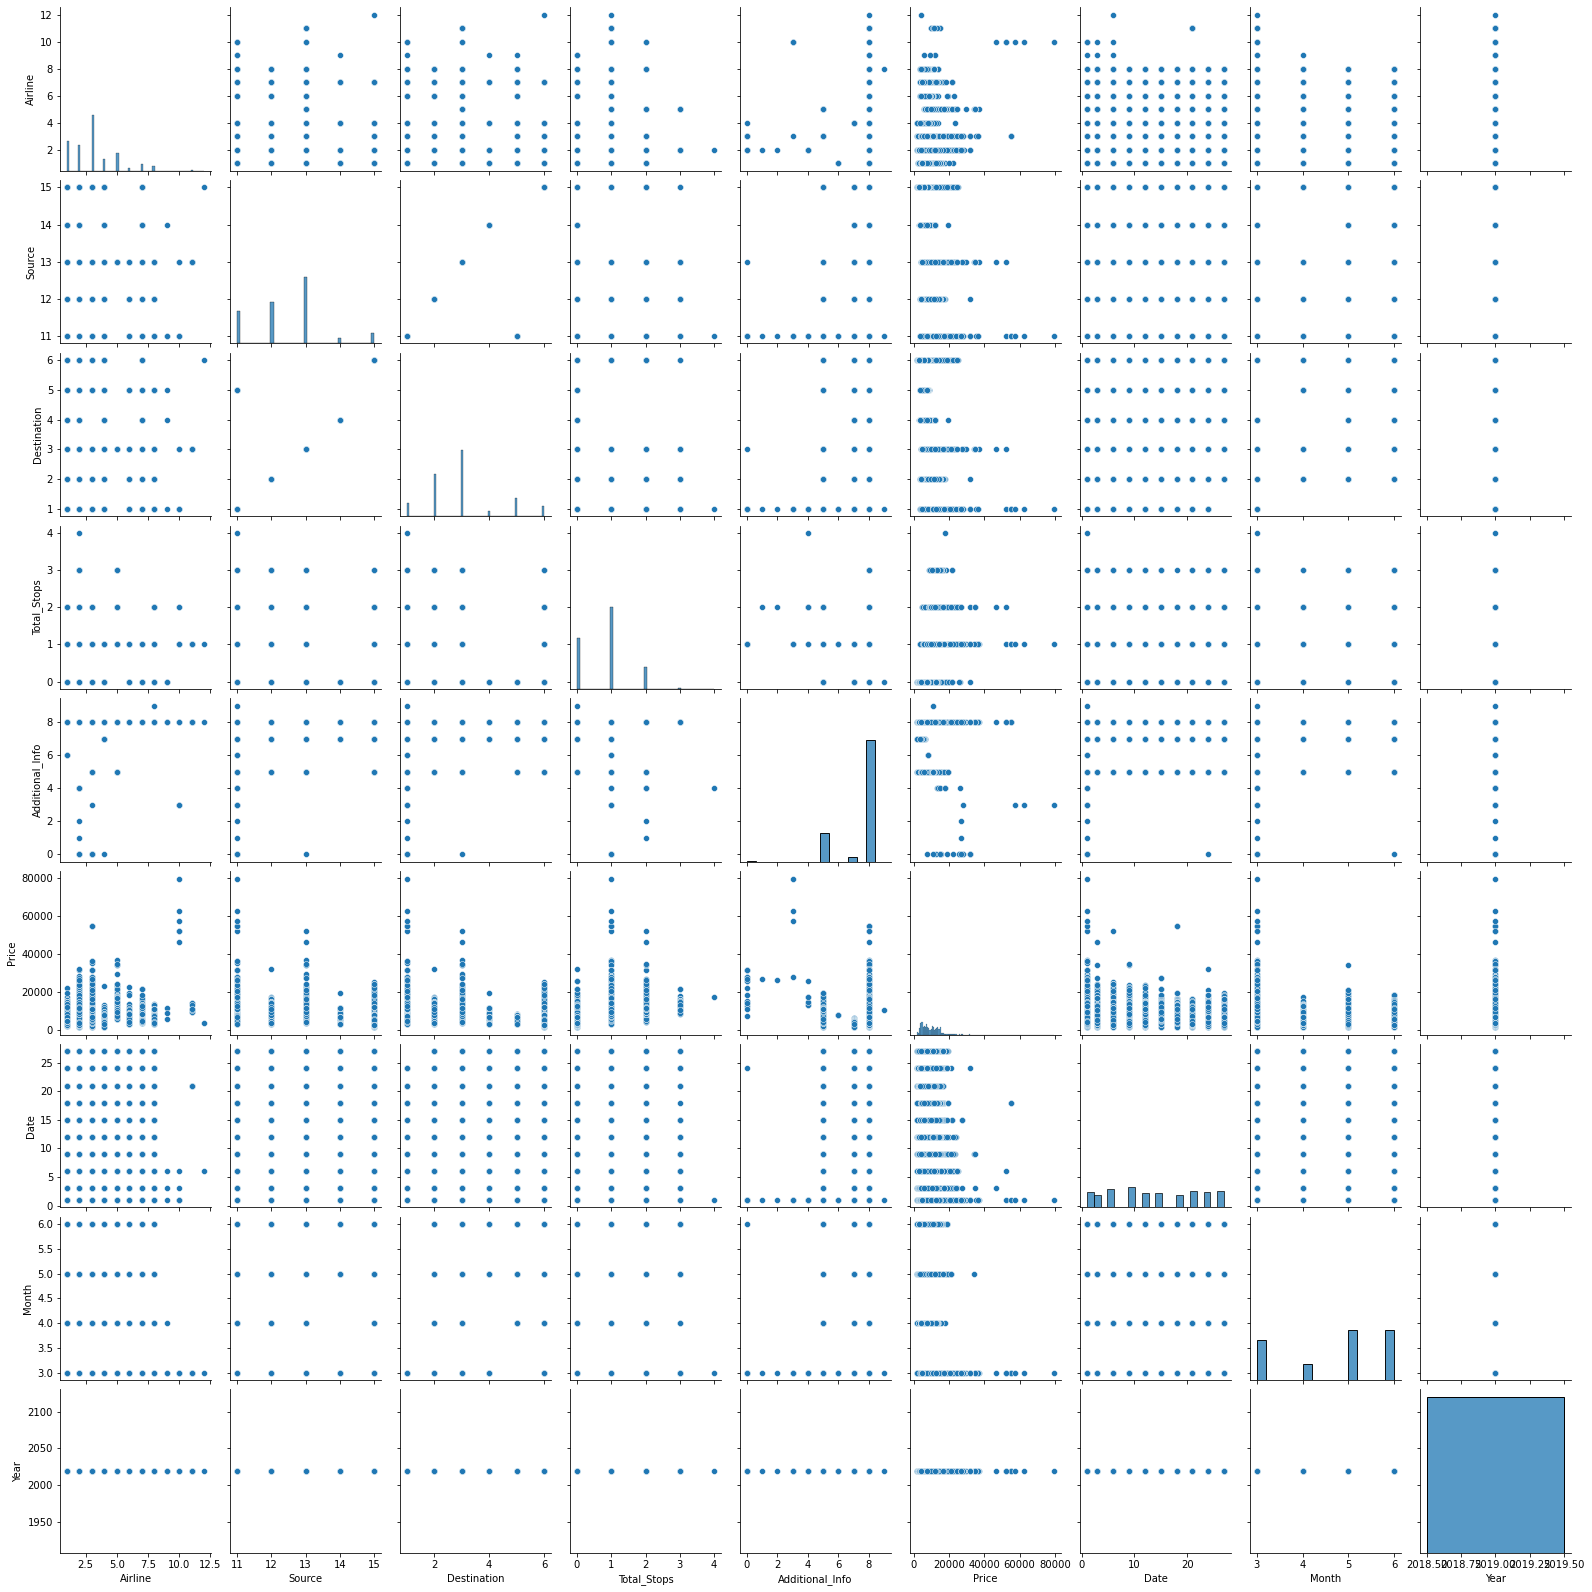

In [69]:
sns.pairplot(fp)

<AxesSubplot:>

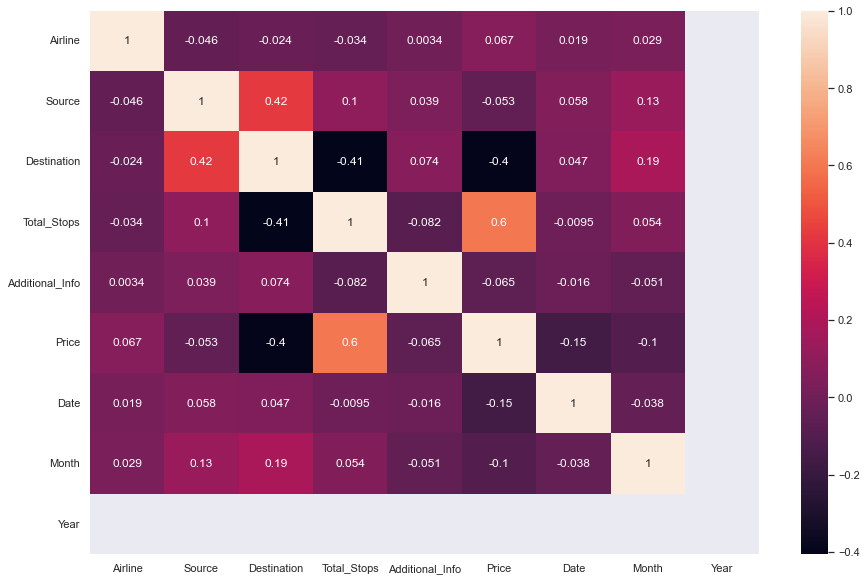

In [70]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(fp.corr(),annot=True)

# 2.  Maximum price and Minimum price of Flights:

In [71]:
fp[fp.Price == (fp.Price.min())]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
4066,4,15,6,1h 25m,0.0,8,1759,21,3,2019,00,10,22,45
4274,4,15,6,1h 25m,0.0,8,1759,27,3,2019,00,10,22,45
4839,4,15,6,1h 30m,0.0,8,1759,3,4,2019,00,15,22,45
10513,4,15,6,1h 20m,0.0,8,1759,27,3,2019,07,05,05,45


In [72]:
fp[fp.Price == (fp.Price.max())]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
2924,10,11,1,5h 40m,1.0,3,79512,1,3,2019,11,25,05,45
